# Yêu cầu vẽ biểu đồ kết hợp để:


# 1.Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Database_practice\house_price_Dống-Da_Hà-Nội_subdata.csv")
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


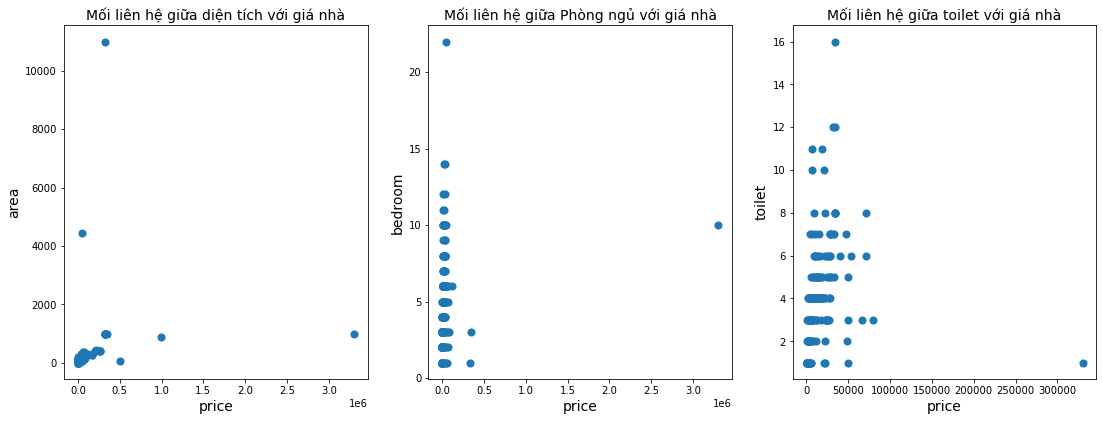

In [16]:
fig,ax=plt.subplots(1,
                   3)
# phân tích mối liên hệ giữa diện tích với giá nhà
ax[0].scatter(df['price'], df['area'], s = 50)
ax[0].set_title('Mối liên hệ giữa diện tích với giá nhà',fontsize=14)
ax[0].set_xlabel('price',fontsize=14)
ax[0].set_ylabel('area',fontsize=14)


# phân tích mối liên hệ giữa Phòng ngủ với giá nhà

ax[1].scatter(df['price'], df['bedroom'], s = 50)
ax[1].set_title('Mối liên hệ giữa Phòng ngủ với giá nhà',fontsize=14)
ax[1].set_xlabel('price',fontsize=14)
ax[1].set_ylabel('bedroom',fontsize=14)

# phân tích mối liên hệ giữa toalet với giá nhà

ax[2].scatter(df['price'], df['toilet'], s = 50)
ax[2].set_title('Mối liên hệ giữa toilet với giá nhà',fontsize=14)
ax[2].set_xlabel('price',fontsize=14)
ax[2].set_ylabel('toilet',fontsize=14)


fig.set_size_inches(18.5,6.5)

plt.show()

Nhìn vào biểu đồ ta thấy:

- Giá nhà tăng thì khi diện tích tăng
- Xu hướng tăng lên được coi là tuyến tính
- Trong biểu đồ có trường hợp giá nhà cao nhưng diện tích thấp: có thể do khu đất này nằm ở vùng đắt địa
- Có trường hợp diện tích cao nhưng giá nhà thấp thì có thể khu đất này ở những vùng không đắt địa
- Giá nhà không chịu ảnh hưởng bởi số phòng ngủ: số phòng ngủ tăng lên thì giá nhà vẫn vậy
- Có một số dữ liệu thì giá nhà tăng khi số phòng ngủ tăng điều này có thể do sai sót khi nhập liệu
- Giá nhà không chịu ảnh hưởng bởi số toilet: số toilet tăng lên thì giá nhà vẫn vậy
- Có một số dữ liệu thì giá nhà tăng khi số toelet tăng điều này có thể do sai sót khi nhập liệu

# 2.So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồn thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land). 

In [17]:
# Tạo cột giá nhà trung bình trên 1m2 (triệu đồng/m2)
df['million/m2'] = df['price'] * 1000 / df['area']
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,million/m2
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294000.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73684.210526
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177419.354839
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111538.461538
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo,98750.000000


In [21]:
df1 = df.groupby(['property_type'])['postDate'].count()
df1

property_type
mat pho      222
trong ngo    449
Name: postDate, dtype: int64

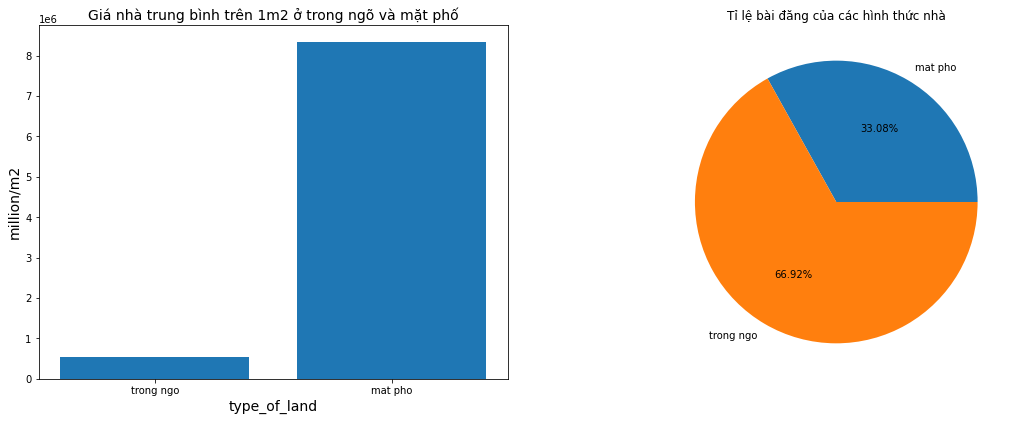

In [23]:
fig,ax=plt.subplots(1,
                   2)
# Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land)
ax[0].bar(df['property_type'], df['million/m2'])
ax[0].set_title('Giá nhà trung bình trên 1m2 ở trong ngõ và mặt phố',fontsize=14)
ax[0].set_ylabel('million/m2',fontsize=14)
ax[0].set_xlabel('type_of_land',fontsize=14)

# Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land)

ax[1].pie(df1,labels=df1.index, autopct = '%1.2f%%')
ax[1].set_title('Tỉ lệ bài đăng của các hình thức nhà')



fig.set_size_inches(18.5,6.5)

plt.show()

- Giá nhà trung bình trên m2 của nhà mặt phố lớn hơn trong ngõ
- Tỷ lệ bài đăng của nhà trong ngõ nhiều hơn nhà mặt phố

# 3.Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ, theo số phòng toilet hoặc theo diện tích.  

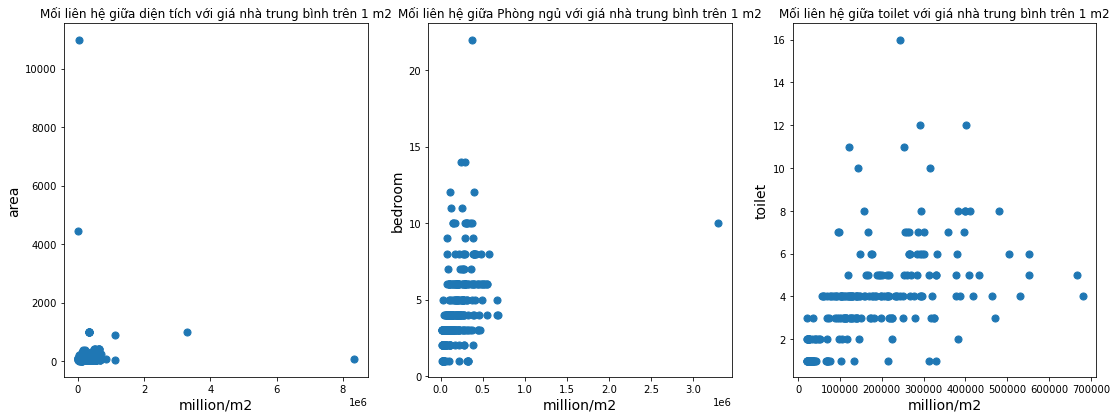

In [26]:
fig,ax=plt.subplots(1,
                   3)
# phân tích mối liên hệ giữa diện tích với giá nhà
ax[0].scatter(df['million/m2'], df['area'], s = 50)
ax[0].set_title('Mối liên hệ giữa diện tích với giá nhà trung bình trên 1 m2',fontsize=12)
ax[0].set_xlabel('million/m2',fontsize=14)
ax[0].set_ylabel('area',fontsize=14)


# phân tích mối liên hệ giữa Phòng ngủ với giá nhà

ax[1].scatter(df['million/m2'], df['bedroom'], s = 50)
ax[1].set_title('Mối liên hệ giữa Phòng ngủ với giá nhà trung bình trên 1 m2',fontsize=12)
ax[1].set_xlabel('million/m2',fontsize=14)
ax[1].set_ylabel('bedroom',fontsize=14)

# phân tích mối liên hệ giữa toalet với giá nhà

ax[2].scatter(df['million/m2'], df['toilet'], s = 50)
ax[2].set_title('Mối liên hệ giữa toilet với giá nhà trung bình trên 1 m2',fontsize=12)
ax[2].set_xlabel('million/m2',fontsize=14)
ax[2].set_ylabel('toilet',fontsize=14)


fig.set_size_inches(18.5,6.5)

plt.show()

# Giá nhà trung bình trên 1 m2 không có mỗi quan hệ tuyến tính với yếu tố số phòng ngủ, toilet hay diện tích nhà 